In [1]:
import pandas as pd
import numpy as np

In [2]:
ratings_data = pd.read_csv("./ml-latest-small/ml-latest-small/ratings.csv")
ratings_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
movies_data = pd.read_csv("./ml-latest-small/ml-latest-small/movies.csv")
movies_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
merged_data = pd.merge(ratings_data[["userId", "movieId", "rating"]], movies_data[["movieId", "title"]] , on="movieId")
merged_data

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)


In [5]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
 3   title    100836 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ MB


In [6]:
merged_data.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [5]:
user_movie_ratings = pd.pivot_table(merged_data, index="userId", columns="movieId", values="rating")
user_movie_ratings

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
user_movie_ratings.fillna(0.0, inplace=True)
user_movie_ratings

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
import json
column_dict = {"columns" : []}
for i in user_movie_ratings.columns:
    column_dict["columns"].append(i)
with open("columnData.json", "w") as f:
    json.dump(column_dict, f)

In [7]:
from scipy.sparse import csr_matrix
sparsed_user_movie_ratings = csr_matrix(user_movie_ratings.values)
print(sparsed_user_movie_ratings)
print(type(sparsed_user_movie_ratings))

  (0, 0)	4.0
  (0, 2)	4.0
  (0, 5)	4.0
  (0, 43)	5.0
  (0, 46)	5.0
  (0, 62)	3.0
  (0, 89)	5.0
  (0, 97)	4.0
  (0, 124)	5.0
  (0, 130)	5.0
  (0, 136)	5.0
  (0, 184)	5.0
  (0, 190)	3.0
  (0, 197)	5.0
  (0, 201)	4.0
  (0, 224)	5.0
  (0, 257)	3.0
  (0, 275)	3.0
  (0, 291)	5.0
  (0, 307)	4.0
  (0, 314)	4.0
  (0, 320)	5.0
  (0, 325)	4.0
  (0, 367)	3.0
  (0, 384)	4.0
  :	:
  (609, 9238)	5.0
  (609, 9246)	4.5
  (609, 9256)	4.0
  (609, 9268)	5.0
  (609, 9274)	3.5
  (609, 9279)	3.5
  (609, 9282)	3.0
  (609, 9288)	3.0
  (609, 9304)	3.0
  (609, 9307)	2.5
  (609, 9312)	4.5
  (609, 9317)	3.0
  (609, 9324)	3.0
  (609, 9339)	4.0
  (609, 9341)	4.0
  (609, 9348)	3.5
  (609, 9371)	3.5
  (609, 9372)	3.5
  (609, 9374)	5.0
  (609, 9415)	4.0
  (609, 9416)	4.0
  (609, 9443)	5.0
  (609, 9444)	5.0
  (609, 9445)	5.0
  (609, 9485)	3.0
<class 'scipy.sparse._csr.csr_matrix'>


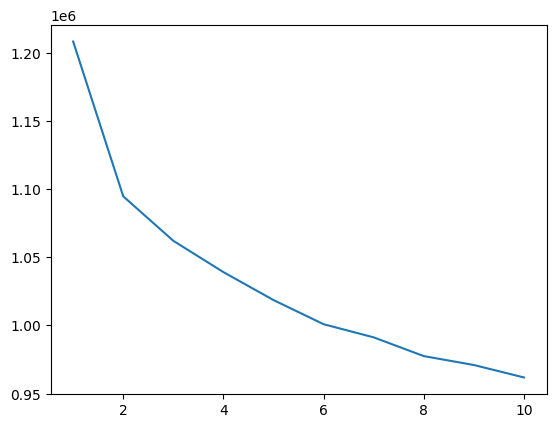

In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

wcss = []

for i in range(1, 11):
    clusters = KMeans(n_clusters=i, init="k-means++", random_state=42)
    clusters.fit(sparsed_user_movie_ratings)
    wcss.append(clusters.inertia_)

ks = [1,2,3,4,5,6,7,8,9,10]
plt.plot(ks, wcss)

In [61]:
clustering_model = KMeans(n_clusters=3, init="k-means++", random_state=42)
clustering_model.fit(sparsed_user_movie_ratings)

KMeans(n_clusters=3, random_state=42)

In [72]:
clustering_model.predict([user_movie_ratings.iloc[0, :]])

array([2])

In [19]:
import joblib
joblib.dump(clustering_model, "Trained_Model_Small_Dataset.sav")

NameError: name 'clustering_model' is not defined

In [74]:
loaded_model = joblib.load("Trained_Model_Small_Dataset.sav")
loaded_model.predict([user_movie_ratings.iloc[0, :]])

array([2])

In [75]:
loaded_model

KMeans(n_clusters=3, random_state=42)

In [76]:
loaded_model.labels_

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,

In [78]:
loaded_model.cluster_centers_

array([[1.03379722, 0.40755467, 0.19681909, ..., 0.00695825, 0.00695825,
        0.00795229],
       [3.88461538, 2.57692308, 1.46153846, ..., 0.        , 0.        ,
        0.        ],
       [2.89893617, 1.4787234 , 0.54787234, ..., 0.        , 0.        ,
        0.        ]])

In [61]:
# from sklearn.pipeline import Pipeline
# pipe = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=4, init="k-means++", random_state=42))])
# pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [65]:
# pipe.fit(merged_data.values)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [66]:
# pipe.predict([[296, 5.0, 1149]])

array([0])

In [67]:
# joblib.dump(pipe, "TrainedPipeLineModel.sav")

['TrainedPipeLineModel.sav']

In [80]:
# loaded_pipeline = joblib.load("TrainedPipeLineModel.sav")
# loaded_pipeline.predict([[296, 5.0, 1149], [1, 5.0, 1149]])

array([0, 0])

In [71]:
# joblib.dump(scalar, "scalar.sav")

['scalar.sav']

In [76]:
# loaded_scalar = joblib.load("scalar.sav")
# loaded_scalar.transform([[200728, 4.0, 0]])

array([[ 2.00432e+05, -1.00000e+00, -1.14900e+03]])

In [77]:
# scalar.inverse_transform(merged_data)

array([[5.92000e+02, 1.00000e+01, 2.29800e+03],
       [5.92000e+02, 1.00000e+01, 2.29800e+03],
       [5.92000e+02, 9.00000e+00, 2.29800e+03],
       ...,
       [1.40266e+05, 8.50000e+00, 2.27400e+03],
       [2.01022e+05, 9.00000e+00, 2.22600e+03],
       [2.01024e+05, 9.00000e+00, 1.14900e+03]])

In [83]:
# for i in merged_data.tail().itertuples():
#     print(loaded_pipeline.predict([[i.movieId, i.rating, i.genres]]))

[3]
[3]
[3]
[3]
[3]
